# <a id='toc1_'></a>[Imports](#toc0_)

In [ ]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver

# <a id='toc2_'></a>[Variables & Functions](#toc0_)

In [16]:
MAIN_BASE_URL = "https://www.tripadvisor.co.kr/Hotel_Review-g297885-d21364207-Reviews{}-Grand_Hyatt_Jeju-Jeju_Jeju_Island.html"

In [17]:
DETAIL_BASE_URL = "https://www.tripadvisor.co.kr/ShowUserReviews-g297885-d21364207-r{}-Grand_Hyatt_Jeju-Jeju_Jeju_Island.html"

In [31]:
headers = {"User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36"}

In [20]:
def generate_main_url(page_num):
    '''페이지 번호를 입력 받아서 해당 트립어드바이저 리뷰 페이지에 접근할 수 있는 url을 반환합니다.'''
    if page_num == 1:
        return MAIN_BASE_URL.format("")
    return MAIN_BASE_URL.format("-or"+str((page_num-1)*10))

# <a id='toc3_'></a>[Scraping](#toc0_)

1. [메인페이지 URL](https://www.tripadvisor.co.kr/Hotel_Review-g297885-d21364207-Reviews-Grand_Hyatt_Jeju-Jeju_Jeju_Island.html)로 접근해서
    - 총 리뷰 개수 구하고
    - 각 페이지에 리뷰가 10개씩 있는 점을 사용해서 총 페이지 수 구하기
2. 페이지 버튼을 클릭하여서 리뷰 첫 페이지부터 마지막 페이지까지 접근
    - 리뷰 상세페이지 링크에서 리뷰 고유번호(review_id)를 수집
        - 해당 태그 예시: 리뷰 고유번호는 939068917
            ```html
            <a target="_blank" href="/ShowUserReviews-g297885-d21364207-r939068917-Grand_Hyatt_Jeju-Jeju_Jeju_Island.html" class="BMQDV _F Gv wSSLS SwZTJ FGwzt ukgoS">올바른 휴식</a>
            ```
3. 리뷰 고유번호를 사용하여 리뷰 상세 페이지 URL로 접근
    - URL 형식: https://www.tripadvisor.co.kr/ShowUserReviews-g297885-d21364207-r{review_id}-Grand_Hyatt_Jeju-Jeju_Jeju_Island.html
    - 목표 데이터 수집

[ 목표데이터 ] <br>
1. review_id(리뷰 고유번호 - 식별용)
2. member_id(리뷰 작성자 id - 식별용)
3. title(리뷰 제목)
4. rating_overall(종합 평점 - 5점 만점)
5. rating_date(리뷰 게시 날짜 - 년 + 월 + 일)
6. review_content(리뷰 내용)
7. stay_date(숙박 날짜 - 년 + 월)
8. trip_type(여행 유형)
9. rating_price(가격 평점 - 5점 만점)
10. rating_location(장소 평점 - 5점 만점)
11. rating_bed(침대의 퀄리티 평점 - 5점 만점)
12. rating_room(객실 평점 - 5점 만점)
13. rating_clean(청결도 평점 - 5점 만점)
14. rating_sevice(서비스 평점 - 5점 만점)

In [33]:
response = requests.get(generate_main_url(1),headers=headers)
response

<Response [403]>

- 직접 웹사이트에 들어가서 스크래핑하려고 했지만 그동안 tripadvisor의 크롤링 검사가 심해진 이유로 차단을 당함.
-> tripadvisor API 를 이용하고자 함

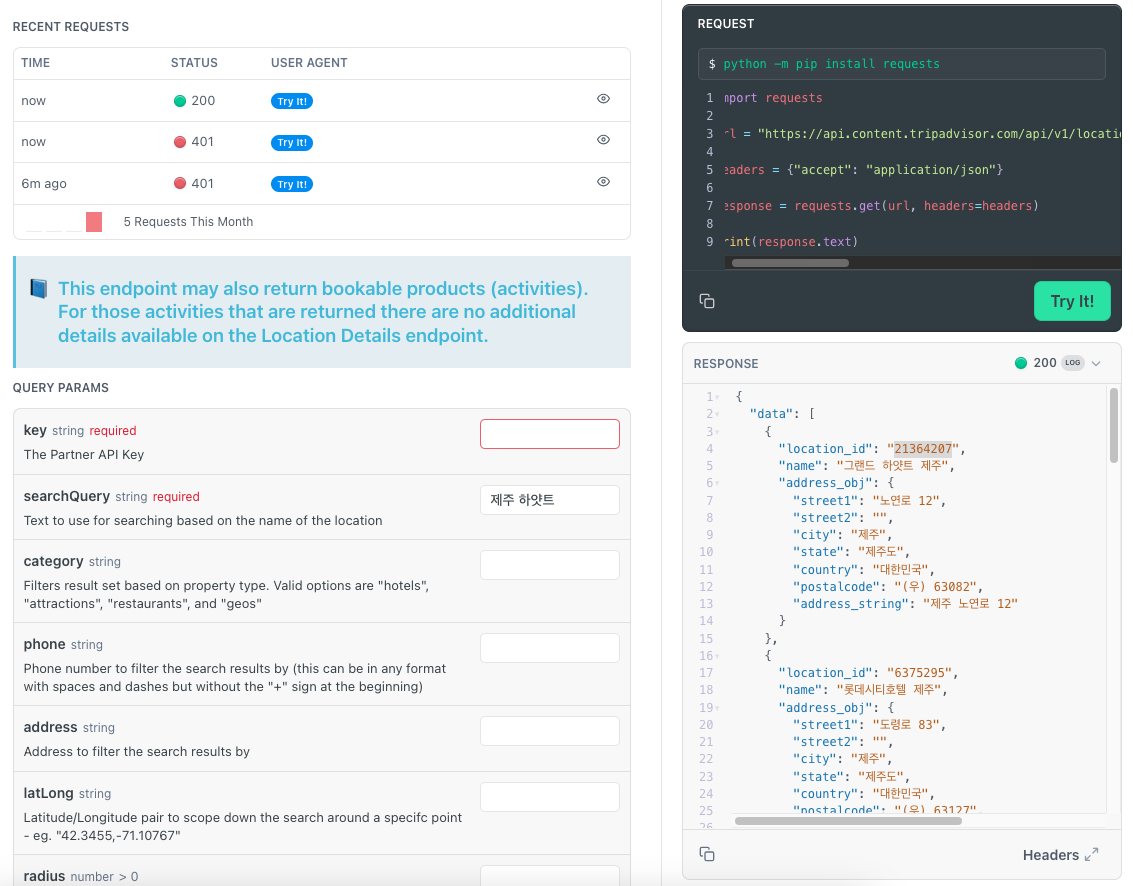

- 1943개의 리뷰가 있는 것으로 확인
- 5개씩 불러올 수 있음

In [56]:
for i in range(5, 1945, 5):
    print(i)

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670
675
680
685
690
695
700
705
710
715
720
725
730
735
740
745
750
755
760
765
770
775
780
785
790
795
800
805
810
815
820
825
830
835
840
845
850
855
860
865
870
875
880
885
890
895
900
905
910
915
920
925
930
935
940
945
950
955
960
965
970
975
980
985
990
995
1000
1005
1010
1015
1020
1025
1030
1035
1040
1045
1050
1055
1060
1065
1070
1075
1080
1085
1090
1095
1100
1105
1110
1115
1120
1125
1130
1135
1140
1145
1150
1155
1160
1165
1170
1175
1180
1185
1190
1195
1200
1205
1210
1215
1220

In [47]:
# !pip install python-dotenv

In [39]:
from dotenv import load_dotenv
import os

load_dotenv()

TRIPADVISOR_API_KEY = os.getenv('TRIPADVISOR_API_KEY')

In [40]:
url = f"https://api.content.tripadvisor.com/api/v1/location/21364207/reviews?language=ko&limit=1500&key={TRIPADVISOR_API_KEY}"

headers = {"accept": "application/json"}

response = requests.get(url, headers=headers)

print(response.text)

{
  "data": [
    {
      "id": 985071413,
      "lang": "ko",
      "location_id": 21364207,
      "published_date": "2024-12-16T18:57:19Z",
      "rating": 5,
      "helpful_votes": 0,
      "rating_image_url": "https://www.tripadvisor.com/img/cdsi/img2/ratings/traveler/s5.0-66827-5.svg",
      "url": "https://www.tripadvisor.co.kr/ShowUserReviews-g297885-d21364207-r985071413-Reviews-Grand_Hyatt_Jeju-Jeju_Jeju_Island.html?m=66827#review985071413",
      "text": "멋진 뷰, 넓직한 룸, 맛있는 식사, 만족할만한 서비스.\n\n언제나 잘 쉬고가는 호텔.\n\n제주여행시마다 그랜드하얏트를 선택하는 이유.",
      "title": "한겨울에 우중 실외수영",
      "trip_type": "가족",
      "travel_date": "2024-11-30",
      "user": {
        "username": "L5316MT_",
        "user_location": {
          "id": "null"
        },
        "avatar": {
          "thumbnail": "https://media-cdn.tripadvisor.com/media/photo-t/0a/3f/e2/a8/caption.jpg",
          "small": "https://media-cdn.tripadvisor.com/media/photo-l/0a/3f/e2/a8/caption.jpg",
          "medium": "https://media-cdn.

In [49]:
response.json()['data'][-1]

{'id': 980848026,
 'lang': 'ko',
 'location_id': 21364207,
 'published_date': '2024-11-18T07:08:34Z',
 'rating': 5,
 'helpful_votes': 0,
 'rating_image_url': 'https://www.tripadvisor.com/img/cdsi/img2/ratings/traveler/s5.0-66827-5.svg',
 'url': 'https://www.tripadvisor.co.kr/ShowUserReviews-g297885-d21364207-r980848026-Reviews-Grand_Hyatt_Jeju-Jeju_Jeju_Island.html?m=66827#review980848026',
 'text': '유명한 침구... 꿀잠 잤고요. 국내 하얏트 중에서는 가격대비 매우 널찍한 룸에 수영장, 조식 다 무난하게 좋았습니다. 라운지38에서 제주 시그니처 칵테일도 맛있었습니다. 칵테일 가격도 매우 합리적이었습니다',
 'title': '하얏트 중 가성비 가심비 모두 충족',
 'trip_type': '커플',
 'travel_date': '2024-11-30',
 'user': {'username': 'Trip02335286172',
  'user_location': {'id': 'null'},
  'avatar': {'thumbnail': 'https://media-cdn.tripadvisor.com/media/photo-t/1a/f6/e2/a7/default-avatar-2020-44.jpg',
   'small': 'https://media-cdn.tripadvisor.com/media/photo-l/1a/f6/e2/a7/default-avatar-2020-44.jpg',
   'medium': 'https://media-cdn.tripadvisor.com/media/photo-f/1a/f6/e2/a7/default-avatar-2020-44.jpg'

In [53]:
result = response.json()['data']

In [55]:
result

[{'id': 985071413,
  'lang': 'ko',
  'location_id': 21364207,
  'published_date': '2024-12-16T18:57:19Z',
  'rating': 5,
  'helpful_votes': 0,
  'rating_image_url': 'https://www.tripadvisor.com/img/cdsi/img2/ratings/traveler/s5.0-66827-5.svg',
  'url': 'https://www.tripadvisor.co.kr/ShowUserReviews-g297885-d21364207-r985071413-Reviews-Grand_Hyatt_Jeju-Jeju_Jeju_Island.html?m=66827#review985071413',
  'text': '멋진 뷰, 넓직한 룸, 맛있는 식사, 만족할만한 서비스.\n\n언제나 잘 쉬고가는 호텔.\n\n제주여행시마다 그랜드하얏트를 선택하는 이유.',
  'title': '한겨울에 우중 실외수영',
  'trip_type': '가족',
  'travel_date': '2024-11-30',
  'user': {'username': 'L5316MT_',
   'user_location': {'id': 'null'},
   'avatar': {'thumbnail': 'https://media-cdn.tripadvisor.com/media/photo-t/0a/3f/e2/a8/caption.jpg',
    'small': 'https://media-cdn.tripadvisor.com/media/photo-l/0a/3f/e2/a8/caption.jpg',
    'medium': 'https://media-cdn.tripadvisor.com/media/photo-f/0a/3f/e2/a8/caption.jpg',
    'large': 'https://media-cdn.tripadvisor.com/media/photo-s/0a/3f/e2/a8/capt

In [57]:
for i in range(5, 1945, 5):
    url = f"https://api.content.tripadvisor.com/api/v1/location/21364207/reviews?language=ko&limit=5&offset={i}&key={TRIPADVISOR_API_KEY}"

    headers = {"accept": "application/json"}

    response = requests.get(url, headers=headers)

    result.append(response.json()['data'])

In [59]:
len(result)

393

In [63]:
result[13]

[]

API 도 사용하려고 했지만, 무료 버전은 최근 리뷰 5개만 가져올 수 있기 때문에 강의에서 제공하는 데이터를 사용하기로 결정